<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-ML-Internship/blob/main/Elevvo_Pathways_ML_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Dataset

In [43]:
import kagglehub
lainguyn123_student_performance_factors_path = kagglehub.dataset_download('lainguyn123/student-performance-factors')

print('Data Source import complete.')

Data Source import complete.


In [44]:
# Load the dataset from the CSV file
df= pd.read_csv("/content/StudentPerformanceFactors.csv")

# Exploratory Data Analysis (Data Cleaning)

In [45]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [46]:
df.shape

(6607, 20)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [50]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric with median
df[num_cols] = df[num_cols].T.fillna(df[num_cols].median(axis=1)).T

# Fill categorical  with mode
for col in cat_cols:
    mode = df[col].mode()
    if not mode.empty:
        df[col].fillna(mode[0], inplace=True)



In [51]:
# Now the data is cleaned
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# Train-Test splitting

In [52]:
# We need to define the input and the output
X=df[['Hours_Studied']]
y=df['Exam_Score']
print(X.shape)
print(y.shape)
print(X.head(5))
print(y.head(5))

(6607, 1)
(6607,)
   Hours_Studied
0             23
1             19
2             24
3             29
4             19
0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64


In [53]:
# 80% train and 20% test
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [55]:
pred=model.predict(test_X)

# Evaluation

In [56]:
mse = mean_squared_error(test_y, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.85592128879332


In [57]:
results = pd.DataFrame({
    'Actual': test_y,      # Actual values
    'Predicted': pred      # Predicted values
})

# Display the results
print(results.head(5))


      Actual  Predicted
743       65  67.224542
5551      65  67.795880
3442      71  67.510211
6571      64  64.939192
4204      66  67.510211


# Real Vs Predicted results as a Graph

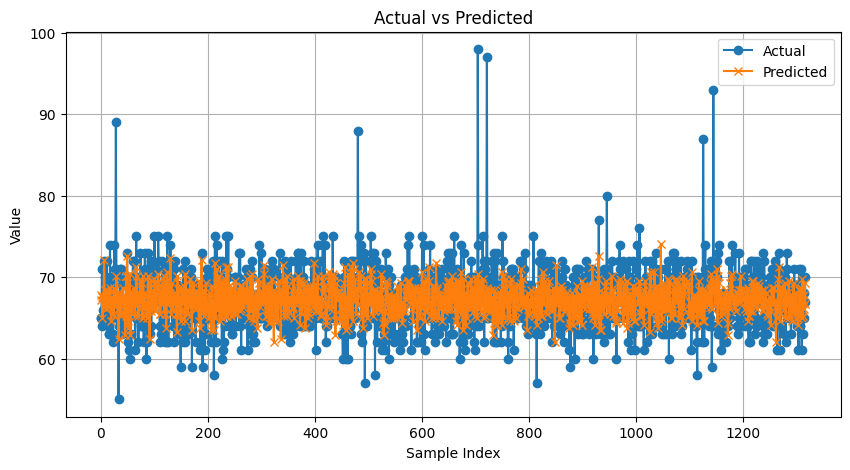

In [58]:
# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(results['Actual'].values[:-5], label='Actual', marker='o')
plt.plot(results['Predicted'].values[:-5], label='Predicted', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()